## Macroeconomic indicators: S&P 500 historical data

In this section, I add in data for macroeconomic indicators. I take the S&P 500 index as an indicator for wider economy crashes/recessions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_indices_data = pd.read_excel('./EconomicIndices/dailypricehistory.xls',skiprows=4)

In [3]:
all_indices_data.head()

,Unnamed: 0,BXMSM,SPTR,SPXSM,PUTSM,CLL*,BXYSM,VIX®,VXOSM,BXMD,BFLY,CLLZ,CMBO,CNDR,PPUT
0,1986-01-02 00:00:00,NaN,NaN,209.59,NaN,NaN,NaN,NaN,18.07,NaN,NaN,NaN,NaN,NaN,NaN
1,1986-01-03 00:00:00,NaN,NaN,210.88,NaN,NaN,NaN,NaN,17.96,NaN,NaN,NaN,NaN,NaN,NaN
2,1986-01-06 00:00:00,NaN,NaN,210.65,NaN,NaN,NaN,NaN,17.05,NaN,NaN,NaN,NaN,NaN,NaN
3,1986-01-07 00:00:00,NaN,NaN,213.80,NaN,NaN,NaN,NaN,17.39,NaN,NaN,NaN,NaN,NaN,NaN
4,1986-01-08 00:00:00,NaN,NaN,207.97,NaN,NaN,NaN,NaN,19.97,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sp500 = all_indices_data[['Unnamed: 0','SPXSM']]

In [5]:
sp500.columns = ['Date','SP500']

In [6]:
sp500 = sp500.drop(sp500.index[7984:]) # unnecessary data at the end

In [7]:
sp500.Time = pd.to_datetime(sp500.Date)

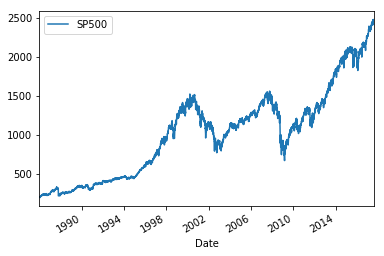

In [8]:
sp500.plot('Date','SP500')
plt.show()

The values for the S&P 500 index are daily, they should be converted to monthly averages to compare to all the other datasets.



In [9]:
sp500.set_index('Date',inplace=True)
sp500_month = sp500.groupby(pd.Grouper(freq='M')).mean()

In [10]:
sp500_month.reset_index(inplace=True)

In [11]:
sp500_month.Date = sp500_month.Date.dt.strftime('%m/%Y')

In [12]:
sp500_month.head()

,Date,SP500
0,01/1986,208.194091
1,02/1986,219.365263
2,03/1986,232.327000
3,04/1986,237.967727
4,05/1986,238.459048


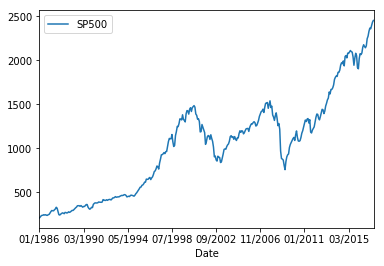

In [13]:
sp500_month.plot('Date','SP500')
plt.show()

In [14]:
sp500_month.to_csv('./EconomicIndices/sp500_month.csv',index=False)